In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
from collections import Counter
import os
import pickle

In [2]:
names=['URL','Category']
df=pd.read_csv('/content/website_classification.csv',names=names, na_filter=False)

df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 = df[535300:537300]
df5 = df[650000:652000]
df6 = df[710000:712000]
df7 = df[764200:766200]
df8 = df[793080:795080]
df9 = df[839730:841730]
df10 = df[850000:852000]
df11 = df[955250:957250]
df12 = df[1013000:1015000]
df13 = df[1143000:1145000]
df14 = df[1293000:1295000]
df15 = df[1492000:1494000]
dt = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)

df.drop(df.index[1:2000], inplace= True)
df.drop(df.index[50000:52000], inplace= True)
df.drop(df.index[520000:522000], inplace= True)
df.drop(df.index[535300:537300], inplace= True)
df.drop(df.index[650000:652000], inplace= True)
df.drop(df.index[710000:712000], inplace= True)
df.drop(df.index[764200:766200], inplace= True)
df.drop(df.index[793080:795080], inplace= True)
df.drop(df.index[839730:841730], inplace= True)
df.drop(df.index[850000:852000], inplace= True)
df.drop(df.index[955250:957250], inplace= True)
df.drop(df.index[1013000:1015000], inplace= True)
df.drop(df.index[1143000:1145000], inplace= True)
df.drop(df.index[1293000:1295000], inplace= True)
df.drop(df.index[1492000:1494000], inplace= True)

Text(0, 0.5, 'Numbe Category for Training')

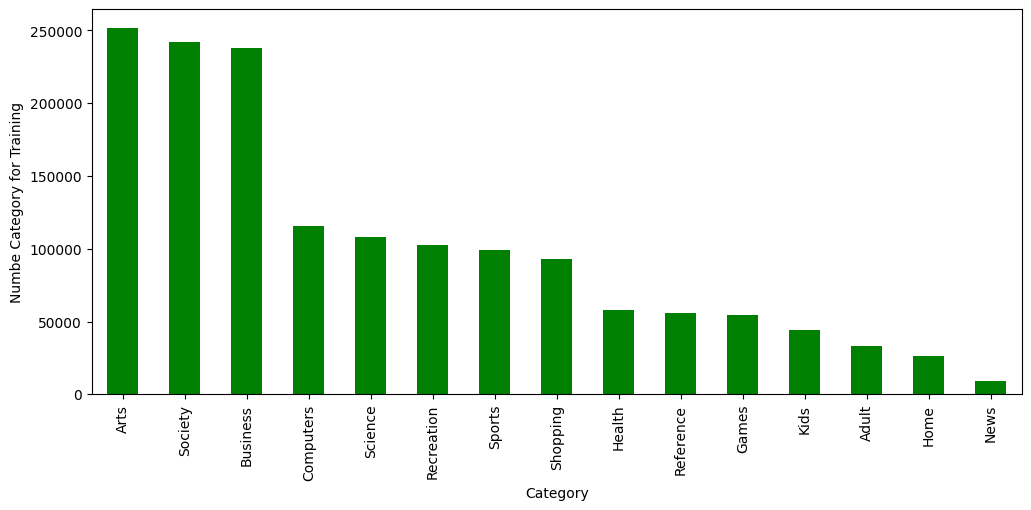

In [3]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Numbe Category for Training')

Text(0, 0.5, 'Total Number Of Individual Category for Testing')

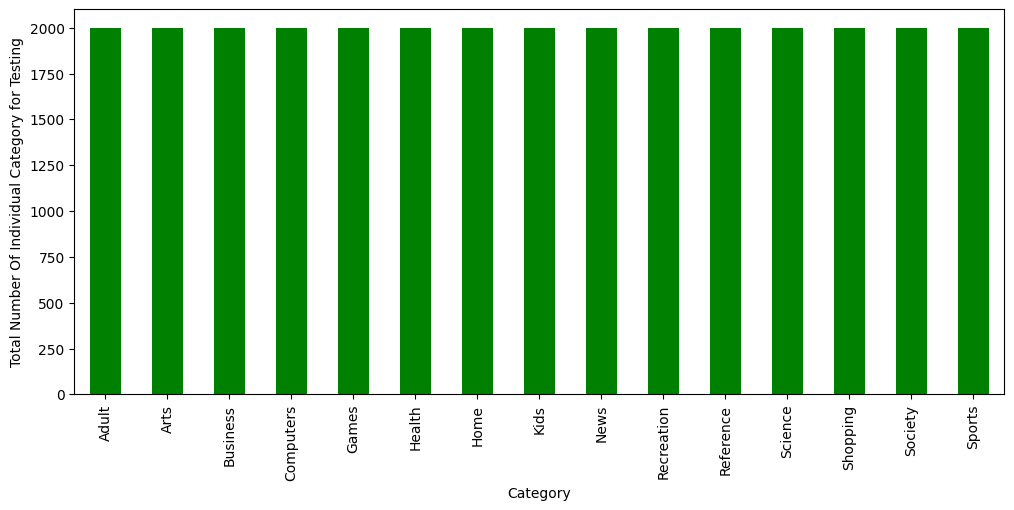

In [4]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['URL'], df['Category'],test_size=0.2, random_state = 0)

In [6]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1226383,)
y_train shape: (1226383,)
x_test shape: (306596,)
y_test shape: (306596,)


In [7]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(x_train, y_train)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(x_train, y_train)

In [9]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_train = gs_clf.predict(x_train)
y_pred_test = gs_clf.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print('Train Accuracy: ', str(acc_train))
print('Test Accuracy: ', str(acc_test))

Train Accuracy:  0.9550548238193126
Test Accuracy:  0.5058187321426242


In [10]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       Adult       0.92      0.51      0.65      6597
        Arts       0.58      0.60      0.59     50302
    Business       0.34      0.85      0.49     47762
   Computers       0.70      0.39      0.50     23032
       Games       0.74      0.50      0.60     10842
      Health       0.74      0.31      0.43     11686
        Home       0.81      0.43      0.56      5253
        Kids       0.48      0.31      0.38      8828
        News       0.56      0.12      0.20      1863
  Recreation       0.50      0.23      0.32     20654
   Reference       0.53      0.48      0.50     11295
     Science       0.63      0.54      0.58     21812
    Shopping       0.41      0.06      0.10     18556
     Society       0.57      0.56      0.57     48444
      Sports       0.79      0.39      0.52     19670

    accuracy                           0.51    306596
   macro avg       0.62      0.42      0.47    306596
weighted avg       0.57   

In [11]:
labels = []
for i in df['Category']:
  if i not in labels:
    labels.append(i)
print(labels)

['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society', 'Sports']


<Axes: >

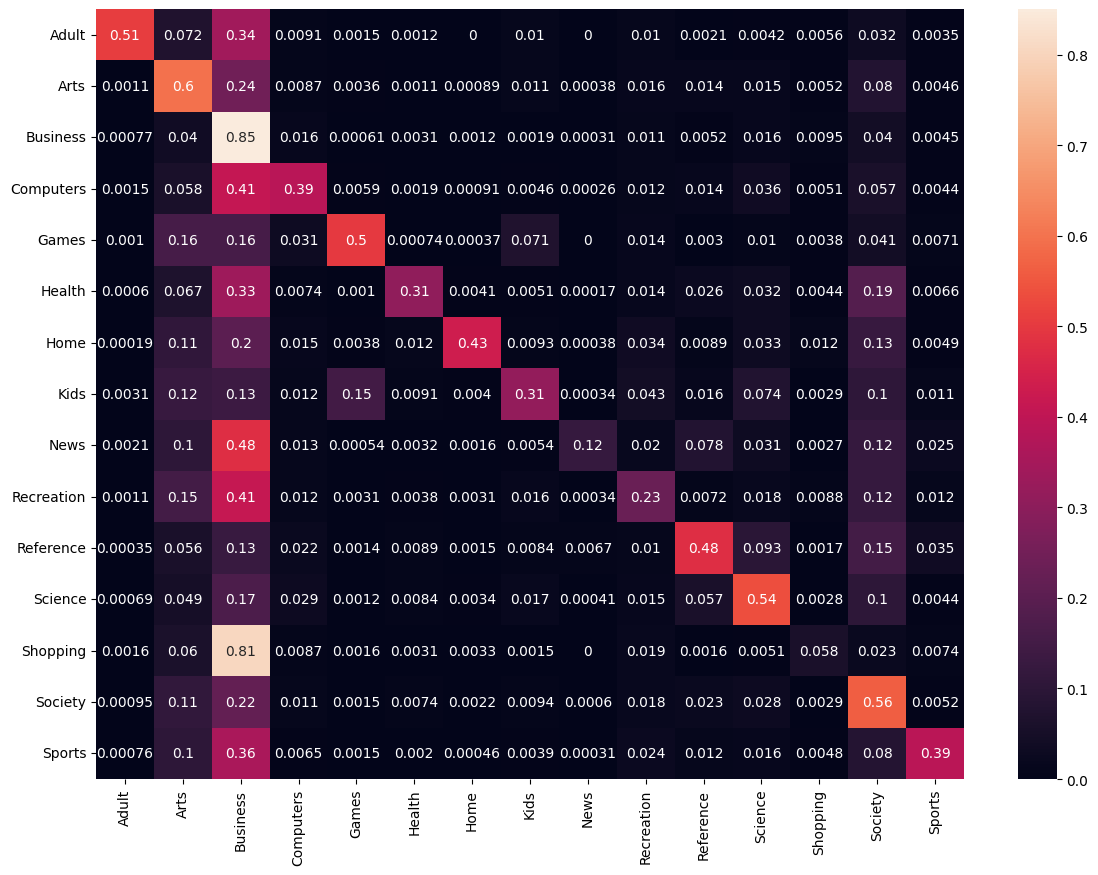

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred_test)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (14,10))
sn.heatmap(df_cm, annot=True)

In [13]:
url_test_1 ='http://www.businesstoday.net/'
url_test_2 ='http://www.gamespot.net/'
url_test_3='https://www.theguardian.com/society/2023/apr/04/pandemic-triggered-second-midlife-crisis-among-over-50s-study-finds'
url_test_4 ='https://edition.cnn.com/2023/03/28/football/lionel-messi-diego-maradona-statue-conmebol-spt-intl/index.html'
url_test_5 ='https://www.theartnewspaper.com/'

In [14]:
print(gs_clf.predict([url_test_1]))
print(gs_clf.predict([url_test_2]))
print(gs_clf.predict([url_test_3]))
print(gs_clf.predict([url_test_4]))

['Business']
['Games']
['Arts']
['Sports']


In [15]:
# save the model to disk
pickle.dump(
    gs_clf, open('/content/website_classification.pkl', "wb")
)  # export the model to a file so we can use it later

In [16]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [17]:
# Load the model 
import joblib
clf_rf = joblib.load('/content/drive/MyDrive/Cursos dictados/website_classification.pkl') # Carga del modelo.

In [18]:
pred1 = clf_rf.predict([url_test_1])
pred2 = clf_rf.predict([url_test_2])
pred3 = clf_rf.predict([url_test_3])
pred4 = clf_rf.predict([url_test_4])
pred5 = clf_rf.predict([url_test_5])

print(pred1[0])
print(pred2[0])
print(pred3[0])
print(pred4[0])
print(pred5[0])

Business
Games
Arts
Sports
Arts


## Web scraping

In [19]:
class ScrapTool:
    def visit_url(self, website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        #headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
        content = requests.get(website_url,timeout=60).content
        
        #lxml is apparently faster than other settings.
        soup = BeautifulSoup(content, "lxml")
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                                               self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(text=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [20]:
scrapTool = ScrapTool()
web=dict(scrapTool.visit_url(url_test_1))

<ipython-input-19-5beeb29c9fd7>:46: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find_all(text=True)


In [21]:
web['website_url']

'http://www.businesstoday.net/'

In [22]:
web['website_name']

'businesstoday'

In [23]:
web['website_text']

'Buy Domains - businesstoday.net is for sale!Buy a domain and see how a premium domain can be the best investment. Your business starts here. Buy a domain today. premium domain, buy domainbusinesstoday.net Get a price in less than 24 hoursThis domain name is for sale Give us a call (855) 687-0658 We couldn\'t process your inquiry at this time. This Domain is no longer available. Please contact sales@buydomains.com or call (855) 687-0658 Use Facebook or Google to pre-fill your contact information Use Facebook Please enter your first name Please enter your last name Please enter a valid e-mail address {{showBadEmailMessage}} Please enter a valid phone number Please enter a valid phone number United States of America Afghanistan Albania Algeria Samoa American Andorra Antigua & Barbuda Anguilla Argentina Armenia Aruba Australia Austria Azerbaijan Bahamas Bahrain Bangladesh Barbados Belarus Belgium Belize Benin Bermuda Bhutan Bolivia Bonaire Bosnia & Herzegovina Botswana Brazil British Indi